#Project On Amazon Best Selling Books

##Importing The Required Libraries

In [2]:
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('seaborn version', sns.__version__)
sns.set_style('whitegrid')

#text data
import string
import re

seaborn version 0.11.0


##Importing The Dataset

In [3]:
df = pd.read_csv('bestsellers with categories.csv')

#Data Preparations

Renaming the column

In [4]:
df.rename(columns={"User Rating" : "User_Rating"}, inplace=True)

In [5]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Correcting The Spelling Mistakes

In [6]:
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

In [7]:
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) 

In [8]:
punctuations = string.punctuation
print('list of punctuations :', punctuations)

list of punctuations : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [9]:
#Percentage of Punctuations

def count_punc(text):
  count= sum(1 for char in text if char in punctuations)
  return round(count/(len(text) - text.count(" "))*100,3)
  df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

In [11]:
no_drop= df.drop_duplicates('Name')
g_count = no_drop['Genre'].value_counts()

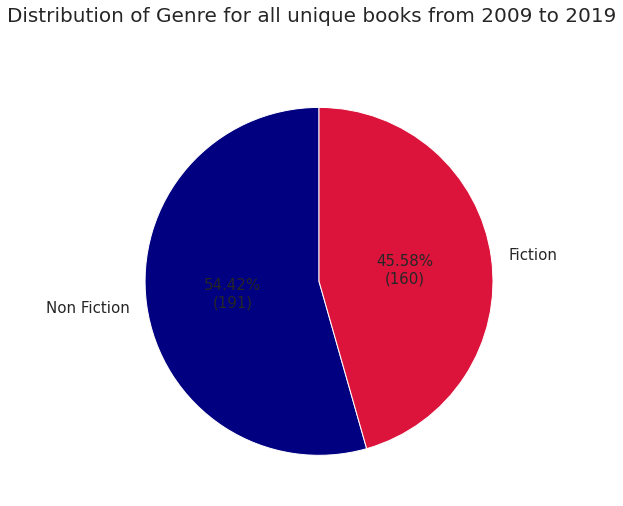

In [12]:
no_drop= df.drop_duplicates('Name')
g_count = no_drop['Genre'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
def make_autopct(values):
  def my_autopct(pct):
    total = sum(values)
    val= int(round(pct*total/100.00))
    return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
  return my_autopct
genre_col = ['navy', 'crimson']
center_circle=plt.Circle((0,0),0.7, color='white')
plt.pie(x= g_count.values, labels= g_count.index, autopct= make_autopct(g_count.values), pctdistance=0.5, textprops= {'size': 15}, startangle= 90, colors=genre_col)
ax.add_artist= center_circle

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

Visualizing the result with respect to each year 

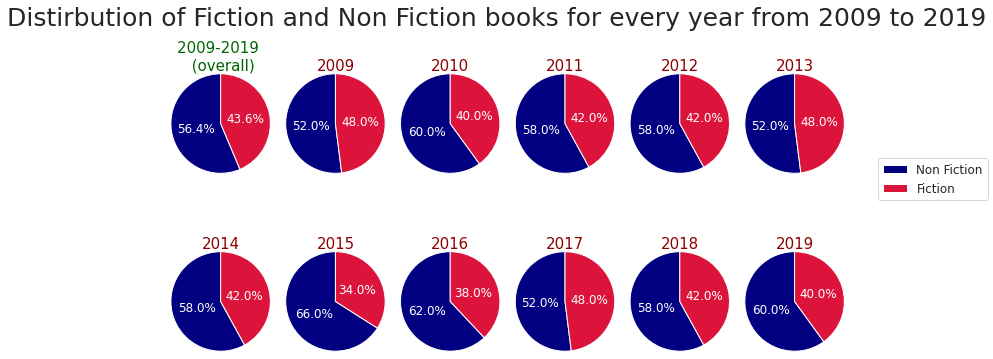

In [15]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count= df['Genre'].value_counts()

fig, ax= plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels= None, autopct= '%1.1f%%', startangle= 90, pctdistance= 0.5, radius= 1.3, textprops={'size': 12, 'color': 'white'}, colors= genre_col)
ax[0,0].set_title('2009-2019 \n (overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
  counts = df[df['Year'] == year]['Genre'].value_counts()
  ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
  ax[0,i+1].pie(x=counts.values, labels= None, autopct= '%1.1f%%', startangle= 90, pctdistance= 0.5, radius= 1.3, textprops={'size': 12, 'color': 'white'}, colors= genre_col)

for i, year in enumerate(y2):
  counts = df[df['Year'] == year]['Genre'].value_counts()
  ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})
  ax[1,i].pie(x=counts.values, labels= None, autopct= '%1.1f%%', startangle= 90, pctdistance= 0.5, radius= 1.3, textprops={'size': 12, 'color': 'white'}, colors= genre_col)

plt.suptitle('Distirbution of Fiction and Non Fiction books for every year from 2009 to 2019', fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

######The bestselling authors are selected based on their appearances in the top 50 bestselling books each year, from 2009 to 2019. Now let’s look at the top 10 bestselling authors of both fiction and non-fiction categories:

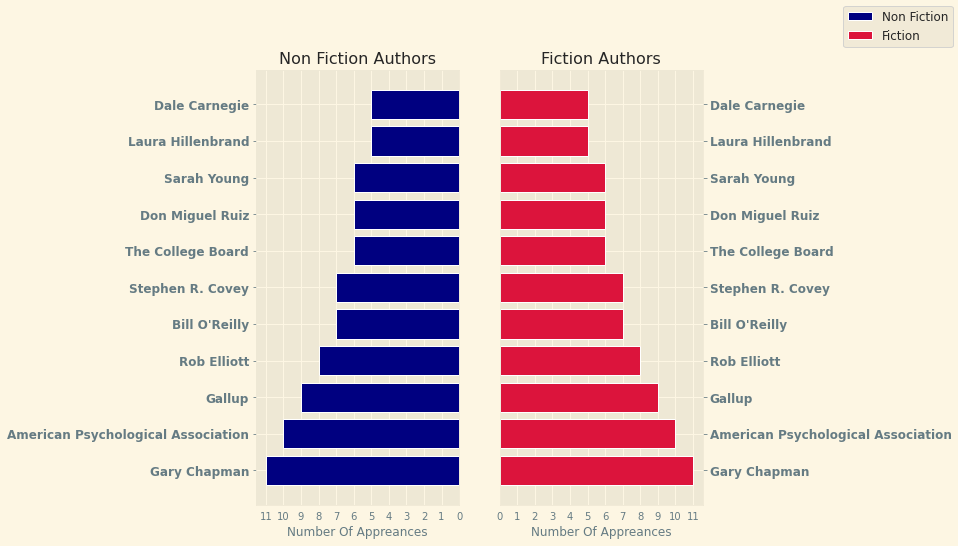

In [19]:
best_nf_authors= df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors= df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
  fig, ax= plt.subplots(1,2, figsize=(8,8))

  ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values, color=genre_col[0])
  ax[0].invert_xaxis()
  ax[0].yaxis.tick_left()
  ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
  ax[0].set_xlabel('Number Of Appearences')
  ax[0].set_title('Non Fiction Authors')

  ax[1].barh(y=best_f_authors.index, width=best_f_authors.values, color=genre_col[1])
  ax[1].yaxis.tick_right()
  ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
  ax[1].set_xlabel('Number Of Appearences')
  ax[1].set_title('Fiction Authors')

  fig.legend(['Non Fiction', 'Fiction'], fontsize=12)

plt.show()

#####Now we will visualize the result of top selling authors based on their appearences in the top selling books each year. The number of appearences includes overall reviews and posts

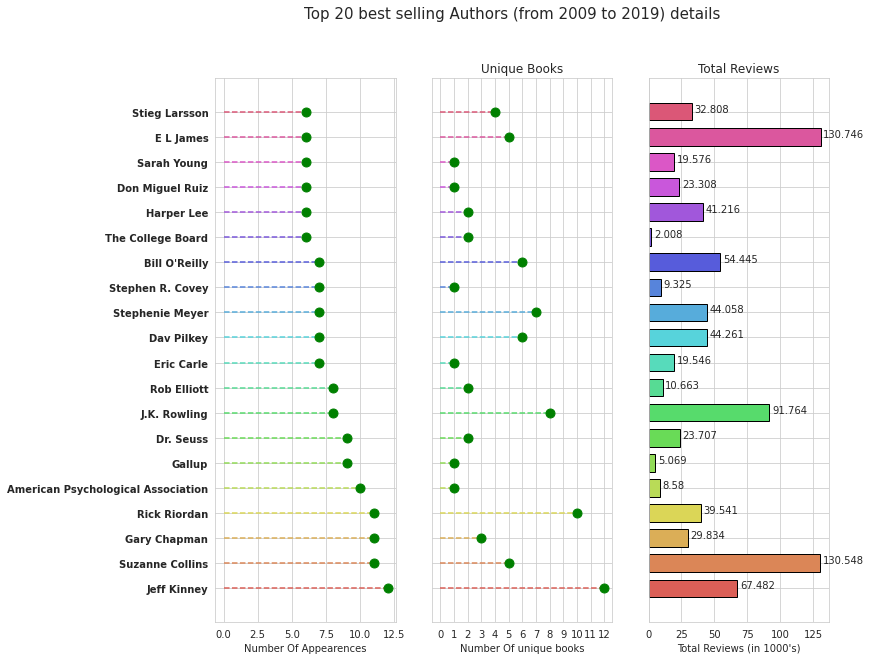

In [22]:
n_best = 20

top_authors= df.Author.value_counts().nlargest(n_best)
no_dup= df.drop_duplicates('Name')

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color= sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index, xmin=0, xmax=top_authors.values, color=color, linestyles= 'dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number Of Appearences')
ax[1].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[1].set_title('Appearences')

book_count=[]
total_reviews = []
for name, col in zip(top_authors.index, color):
  book_count.append(len(no_dup[no_dup.Author == name]['Name']))
  total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index, xmin=0, xmax=book_count, color=color, linestyles= 'dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number Of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique Books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
  ax[2].text(val+2,name,val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total Reviews')

plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()

# ####Final Output: Author Jeff Kinney is the Best Selling Author with 12 appearences in best selling books from 2009 to 2019. 